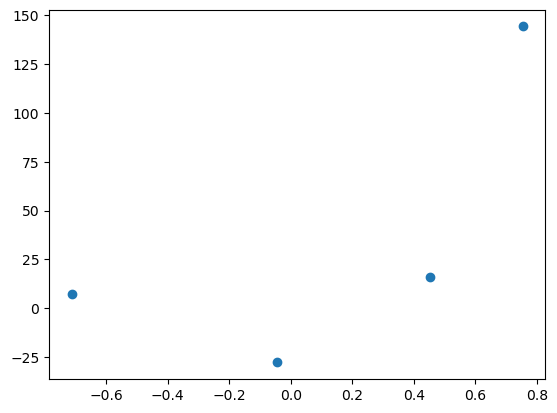

In [1]:
from sklearn.datasets import make_regression
import numpy as np

x,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

import matplotlib.pyplot as plt
plt.scatter(x,y)

In [3]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
reg.coef_, reg.intercept_

(array([78.35063668]), 26.15963284313262)

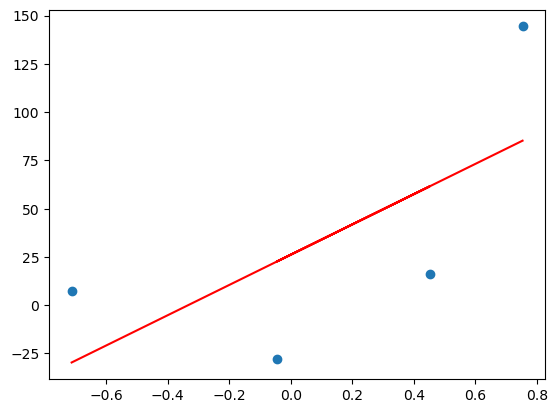

In [5]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x), color = 'red')

We found out the coef parameters of the best fit line through OLS

Now we will apply gradient descent on it to find intercept , with slope known. 

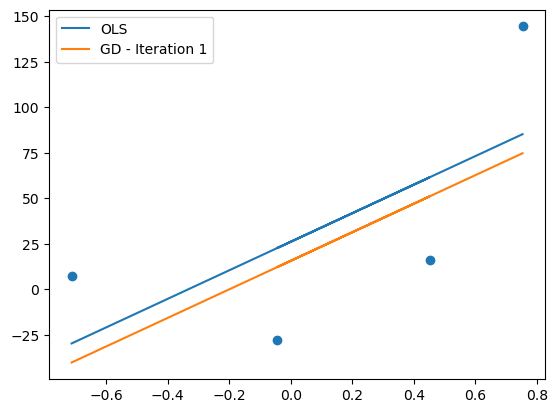

In [30]:
# applying GD
# b = b- lr*slope
# cost function = (sigma (yi - yihat)^2 )/ n = (sigma (yi - mxi - b)^2)/n
# slope = del cost_func/ del b = -2 * sigma(yi - mxi - b) / n

m = reg.coef_
b = 0
lr = 0.3

#1st iteration
slope_wrt_b = -2 * np.mean(y - m*x - b) # mean stands for both sigma and division by n
b = b- lr*slope_wrt_b
y_pred = m*x + b

plt.scatter(x,y)
plt.plot(x,reg.predict(x),label = "OLS")
plt.plot(x,y_pred, label = 'GD - Iteration 1')
plt.legend()
plt.show()

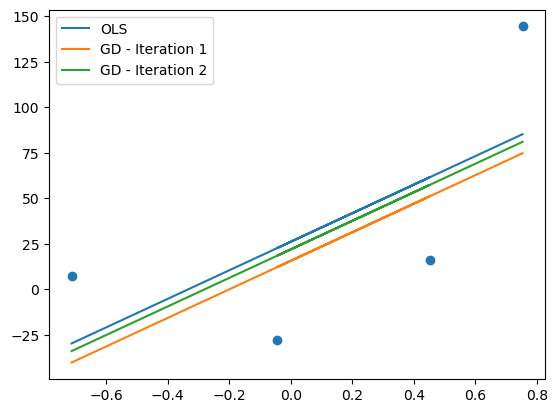

In [31]:
#2nd iteration
slope_wrt_b = -2 * np.mean(y - m*x - b) # mean stands for both sigma and division by n
b = b- lr*slope_wrt_b
y_pred2 = m*x + b

plt.scatter(x,y)
plt.plot(x,reg.predict(x),label = "OLS")
plt.plot(x,y_pred, label = 'GD - Iteration 1')
plt.plot(x,y_pred2, label = 'GD - Iteration 2')
plt.legend()
plt.show()

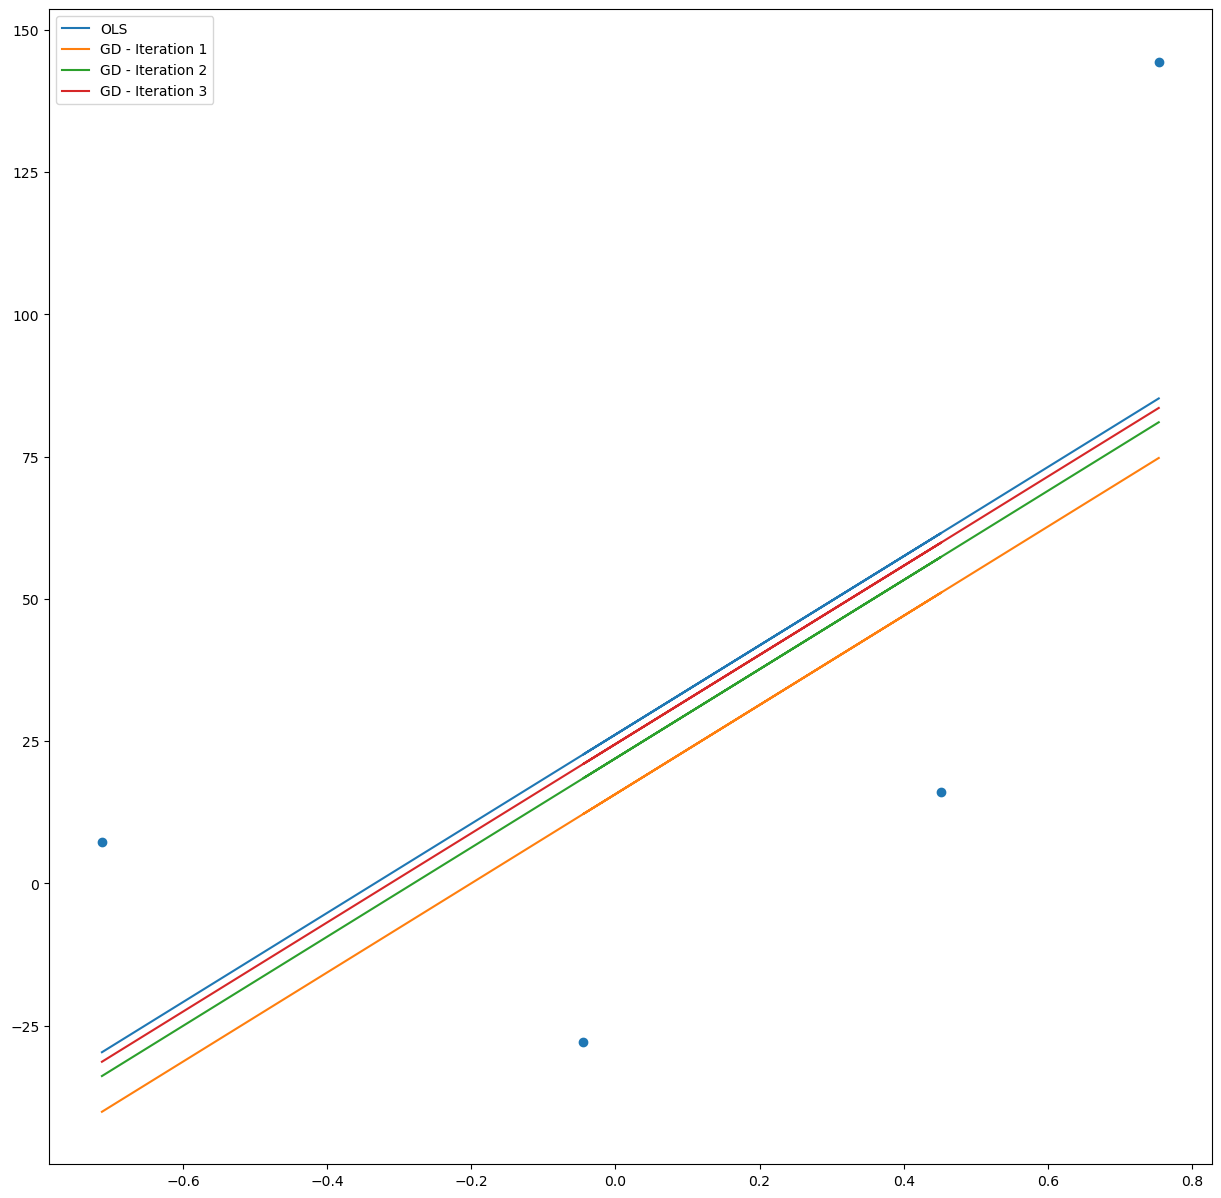

In [32]:
#3rd iteration
slope_wrt_b = -2 * np.mean(y - m*x - b) # mean stands for both sigma and division by n
b = b- lr*slope_wrt_b
y_pred3 = m*x + b

plt.figure(figsize = (15,15))
plt.scatter(x,y)
plt.plot(x,reg.predict(x),label = "OLS")
plt.plot(x,y_pred, label = 'GD - Iteration 1')
plt.plot(x,y_pred2, label = 'GD - Iteration 2')
plt.plot(x,y_pred3, label = 'GD - Iteration 3')
plt.legend()
plt.show()

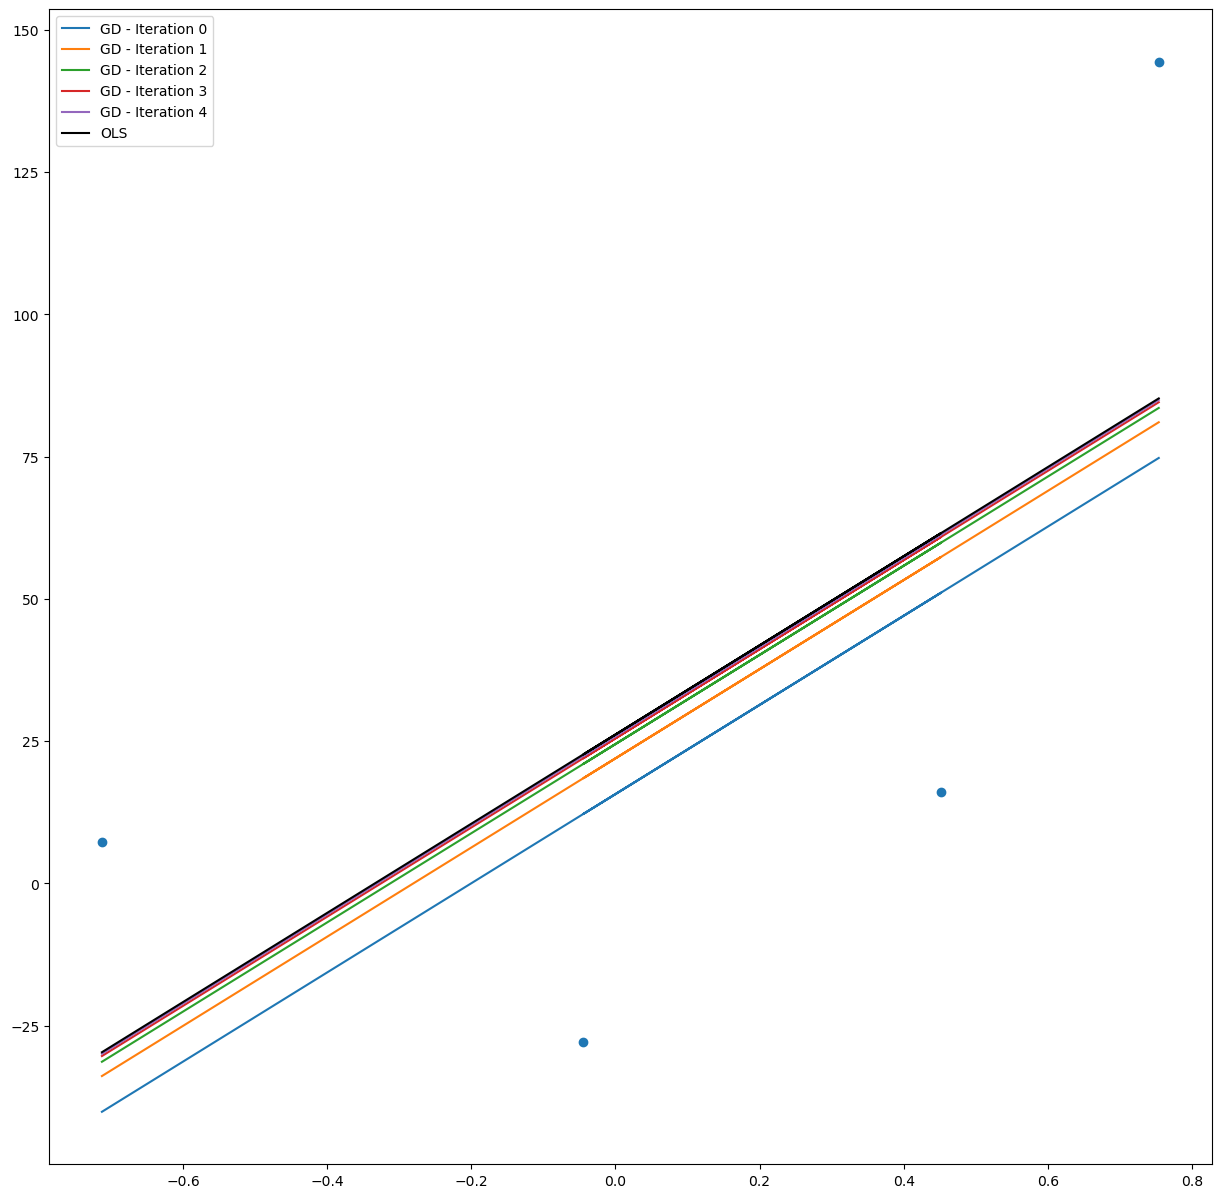

In [38]:
# Automating the iterations with a loop
epochs = 5
m = reg.coef_
b = 0
lr = 0.3
plt.figure(figsize = (15,15))
for i in range(epochs):
    slope_wrt_b = -2 * np.mean(y - m*x - b) # mean stands for both sigma and division by n
    b = b- lr*slope_wrt_b
    y_pred = m*x + b

    plt.plot(x,y_pred, label = 'GD - Iteration {0}'.format(i))
    #plt.legend()
    
plt.scatter(x,y)
plt.plot(x,reg.predict(x),label = "OLS",color='black')
plt.legend()
plt.show()